In this notebook, I use google image to create a face recognition training set. Big thanks to Adrian and his [excellent post](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/). Table of content:
- Step by step walkthrough  
    * get image url use Chrome developer tool (Java in Chrome)  
    * save url to a local txt file (Java in Chrome)  
    * download images
    * check image quality - delete wrong files
    * Find face
    * Crop face for each person and save to seperate folders
- Code to execute the pipeline 

References:
https://blog.algorithmia.com/train-a-face-recognition-model-to-recognize-celebrities/
https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/

# Step by step walkthrough

In [1]:
# from imutils import paths
import argparse
import requests
import cv2
import os
import glob
import shutil # remove all files at one time
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
f = open('urls/yangchaoyue.txt', 'r')
rows=[]
for line in f:
    x = f.readline()
    url = x.strip().split("\n")[0]
#     print(url)
    rows.append(url)

In [ ]:
# loop the URLs
output_dir = './imgs/yangchaoyue'
total = 1

for url in rows[0:5]:
	try:
		# try to download the image
		r = requests.get(url, timeout=60)

		# save the image to disk
		p = os.path.sep.join([output_dir, "{}.jpg".format(str(total).zfill(8))])
		f = open(p, "wb")
		f.write(r.content)
		f.close()

		# update the counter
		print("[INFO] downloaded: {}".format(p))
		total += 1

	# handle if any exceptions are thrown during the download process
	except:
		print("[INFO] error downloading {}...skipping".format(p))

In [ ]:
# Clean up the images in bad format
# loop over the image paths we just downloaded

for imagePath in glob.glob(output_dir+'/*.jpg'):
	# initialize if the image should be deleted or not
	delete = False

	# try to load the image
	try:
		image = cv2.imread(imagePath)

		# if the image is `None` then we could not properly load it
		# from disk, so delete it
		if image is None:
			delete = True

	# if OpenCV cannot load the image then the image is likely
	# corrupt so we should delete it
	except:
		print("Except")
		delete = True

	# check to see if the image should be deleted
	if delete:
		print("[INFO] deleting {}".format(imagePath))
		os.remove(imagePath)

## Detecting and cropping Faces
https://realpython.com/face-recognition-with-python/

In [ ]:
# Get user supplied values
imagePath = './imgs/yangchaoyue/00000001.jpg'
cascPath = './references/haarcascade_frontalface_default.xml'
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)
# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

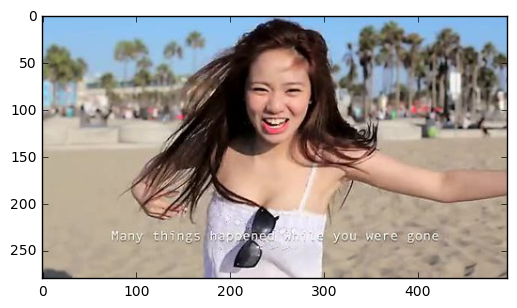

In [57]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [ ]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

In [58]:
print("Found {0} faces!".format(len(faces)))
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

Found 2 faces!


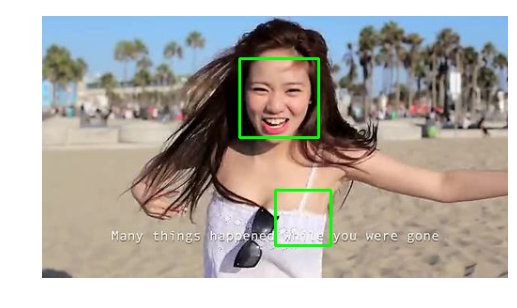

In [59]:
plt.axis("off")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
x=faces[0][0]
y=faces[0][1]
h=faces[0][2]
w=faces[0][3]
crop_img = image[y:y+h, x:x+w]
plt.axis("off")
plt.imshow(cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB))
plt.imsave('face.png',cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB))

# Pipeline functions

In [71]:
def download_imgs(input_url_file, img_path):
    total = 1
    f = open(input_url_file, 'r')
    rows=[]
    for line in f:
        x = f.readline()
        url = x.strip().split("\n")[0]
        rows.append(url)
    
    for url in rows:
        try:
            # try to download the image
            r = requests.get(url, timeout=60)

            # save the image to disk
            p = os.path.sep.join([img_path, "{}.jpg".format(str(total).zfill(8))])
            f = open(p, "wb")
            f.write(r.content)
            f.close()

            # update the counter
            #print("[INFO] downloaded: {}".format(p))
            total += 1

        # handle if any exceptions are thrown during the download process
        except:
            print("[INFO] error downloading {}...skipping".format(p))

In [9]:
def remove_bad_imgs(img_path):
    for imagePath in glob.glob(img_path+'/*.jpg'):
    # initialize if the image should be deleted or not
        delete = False

        # try to load the image
        try:
            image = cv2.imread(imagePath)

            # if the image is `None` then we could not properly load it
            # from disk, so delete it
            if image is None:
                delete = True

        # if OpenCV cannot load the image then the image is likely
        # corrupt so we should delete it
        except:
            print("Except")
            delete = True

        # check to see if the image should be deleted
        if delete:
            print("[INFO] deleting {}".format(imagePath))
            os.remove(imagePath)

In [37]:
def bad_imgs(imagePath):
    
    # initialize if the image should be deleted or not
    delete = False

    # try to load the image
    try:
        image = cv2.imread(imagePath)

        # if the image is `None` then we could not properly load it
        # from disk, so delete it
        if image is None:
            delete = True

        # if OpenCV cannot load the image then the image is likely
        # corrupt so we should delete it
    except:
        print("Except")
        delete = True

        # check to see if the image should be deleted
    if delete:
        print("[INFO] deleting {}".format(imagePath))
        os.remove(imagePath)
        return True
    return False

In [40]:
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
    )
    return faces

In [66]:
def crop_face(img, faces, faces_path,index,name):
    for face in faces:
        x=face[0]
        y=face[1]
        h=face[2]
        w=face[3]
        crop_img = img[y:y+h, x:x+w]
        crop_img = cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB)
        file_name = os.path.sep.join([faces_path,name, "{}.jpg".format(str(index).zfill(8))]) 
        plt.imsave(file_name,crop_img)

In [12]:
# Delete previous images, create folders if not exist
def initialize(url_path,img_path, faces_path):
    files = os.listdir(url_path)
    names = [file.split('.')[0] for file in files]
    if os.path.isdir(img_path): 
        shutil.rmtree(img_path) 
    if os.path.isdir(faces_path): 
        shutil.rmtree(faces_path)
    for name in names:
        os.makedirs(os.path.join(img_path, name))
        os.makedirs(os.path.join(faces_path, name))

In [69]:
def run():
    for name in names:
        face_index = 1
        img_files_path = os.path.join(img_path, name)

        download_imgs(os.path.join(url_path, name)+'.txt',img_files_path)
        for imagePath in glob.glob(img_files_path+'/*.jpg'):
            if bad_imgs(imagePath):
                continue

            image = cv2.imread(imagePath)
            faces = detect_faces(image)
            if len(faces)>0:

                crop_face(image, faces, faces_path, face_index, name)
                face_index +=1
            


In [8]:
url_path ='./urls'
img_path = './imgs/'
faces_path = './faces/'
cascPath = './references/haarcascade_frontalface_default.xml'
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)
names =['yangchaoyue','chenfangyu','mengmeiqi']

In [72]:
initialize(url_path,img_path, faces_path)
run()

[INFO] deleting ./imgs/yangchaoyue/00000112.jpg
[INFO] deleting ./imgs/yangchaoyue/00000085.jpg
[INFO] deleting ./imgs/yangchaoyue/00000053.jpg
[INFO] deleting ./imgs/yangchaoyue/00000147.jpg
[INFO] deleting ./imgs/yangchaoyue/00000168.jpg
[INFO] deleting ./imgs/yangchaoyue/00000021.jpg
[INFO] deleting ./imgs/yangchaoyue/00000169.jpg
[INFO] error downloading ./imgs/chenfangyu/00000171.jpg...skipping
[INFO] deleting ./imgs/chenfangyu/00000115.jpg
[INFO] deleting ./imgs/chenfangyu/00000132.jpg
[INFO] deleting ./imgs/chenfangyu/00000096.jpg
[INFO] deleting ./imgs/chenfangyu/00000151.jpg
[INFO] deleting ./imgs/chenfangyu/00000019.jpg
[INFO] deleting ./imgs/chenfangyu/00000187.jpg
[INFO] deleting ./imgs/chenfangyu/00000182.jpg
[INFO] error downloading ./imgs/mengmeiqi/00000191.jpg...skipping
[INFO] deleting ./imgs/mengmeiqi/00000199.jpg
[INFO] deleting ./imgs/mengmeiqi/00000162.jpg
[INFO] deleting ./imgs/mengmeiqi/00000065.jpg
[INFO] deleting ./imgs/mengmeiqi/00000103.jpg
[INFO] deleting ./

In [15]:
names = ['yangchaoyue','chenfangyu','mengmeiqi']

for name in names:
    index = 1
    face_dir = os.path.sep.join(['./faces',name])
    for imagePath in glob.glob(face_dir+'/*.jpg'):
        image = plt.imread(imagePath)
        file_name = os.path.sep.join([faces_path,name, "{}.jpg".format(name+'_'+str(index))]) 
        plt.imsave(file_name,image)
        index += 1